In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from prettytable import PrettyTable
c_name = pd.read_excel('Company_Name.xlsx')
m_desc = pd.read_excel('Medicine_description.xlsx')
rating = pd.read_excel('Ratings.xlsx')
m_data = pd.read_csv('medical_data.csv')
c_name_rating = pd.merge(c_name, rating, on='Rating')
c_name_rating['Row_Index'] = c_name_rating.index
m_desc['Row_Index'] = m_desc.index
medicine = pd.merge(c_name_rating, m_desc, on='Row_Index')
medicine.drop(columns=['Row_Index'], inplace=True)
medicine.to_csv('merged_medicine_data.csv', index=False)

In [2]:
m_data.info()
m_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Gender    241 non-null    object
 1   Symptoms  241 non-null    object
 2   Causes    241 non-null    object
 3   Disease   241 non-null    object
 4   Medicine  241 non-null    object
dtypes: object(5)
memory usage: 9.5+ KB


,Gender,Symptoms,Causes,Disease,Medicine
count,241,241,241,241,241
unique,3,51,61,64,64
top,Male,"Fatigue, Weakness",Food Poisoning,Gastroenteritis,"Rest, Lifestyle"
freq,116,19,20,20,16


In [3]:
medicine.drop(['Industry', 'S.No'], axis=1, inplace=True)
medicine.info()
medicine.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22481 entries, 0 to 22480
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  22481 non-null  object 
 1   NSE_Symbol    22481 non-null  object 
 2   Rating        22481 non-null  object 
 3   Value         22481 non-null  float64
 4   Drug_Name     22481 non-null  object 
 5   Reason        22481 non-null  object 
 6   Description   22467 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.2+ MB


,Value
count,22481.000000
mean,3.643828
std,0.706973
min,2.500000
25%,3.100000
50%,3.400000
75%,4.300000
max,4.800000


In [4]:
medicine = medicine.dropna()
medicine.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22467 entries, 0 to 22480
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company_Name  22467 non-null  object 
 1   NSE_Symbol    22467 non-null  object 
 2   Rating        22467 non-null  object 
 3   Value         22467 non-null  float64
 4   Drug_Name     22467 non-null  object 
 5   Reason        22467 non-null  object 
 6   Description   22467 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.4+ MB


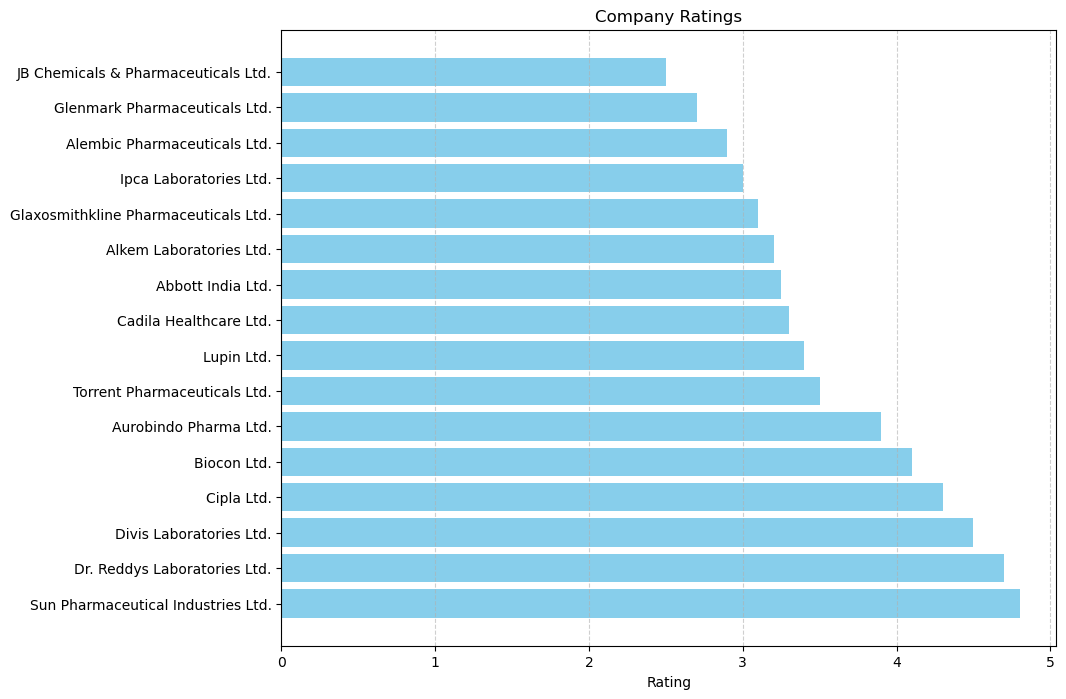

In [5]:
c_name_rating = c_name_rating.sort_values(by='Value', ascending=False)
plt.figure(figsize=(10, 8))
bars = plt.barh(c_name_rating['Company_Name'], c_name_rating['Value'], color='skyblue')
plt.xlabel('Rating')
plt.title('Company Ratings')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

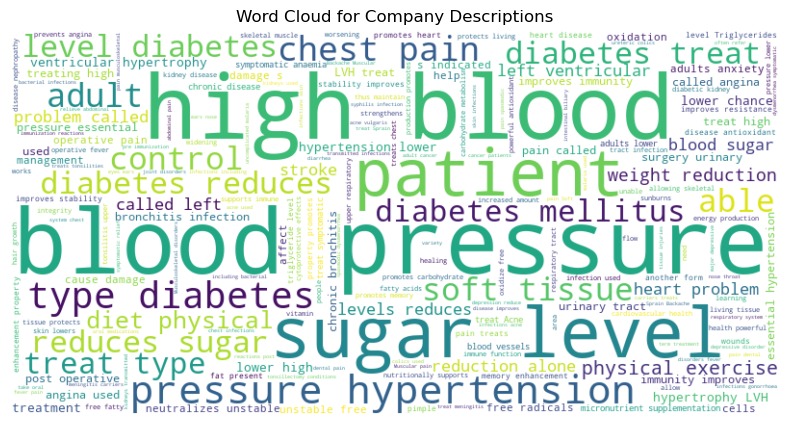

In [6]:
medicine_data = " ".join(medicine['Description'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(medicine_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title('Word Cloud for Company Descriptions')
plt.show()

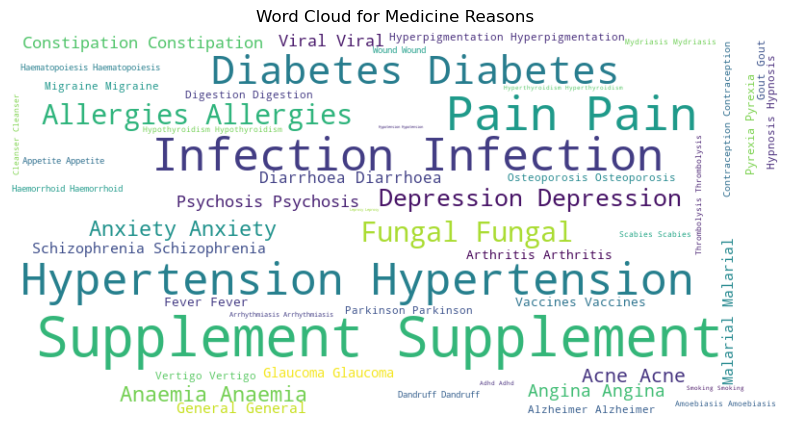

In [7]:
medicine_data = " ".join(medicine['Reason'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(medicine_data)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') 
plt.title('Word Cloud for Medicine Reasons')
plt.show()

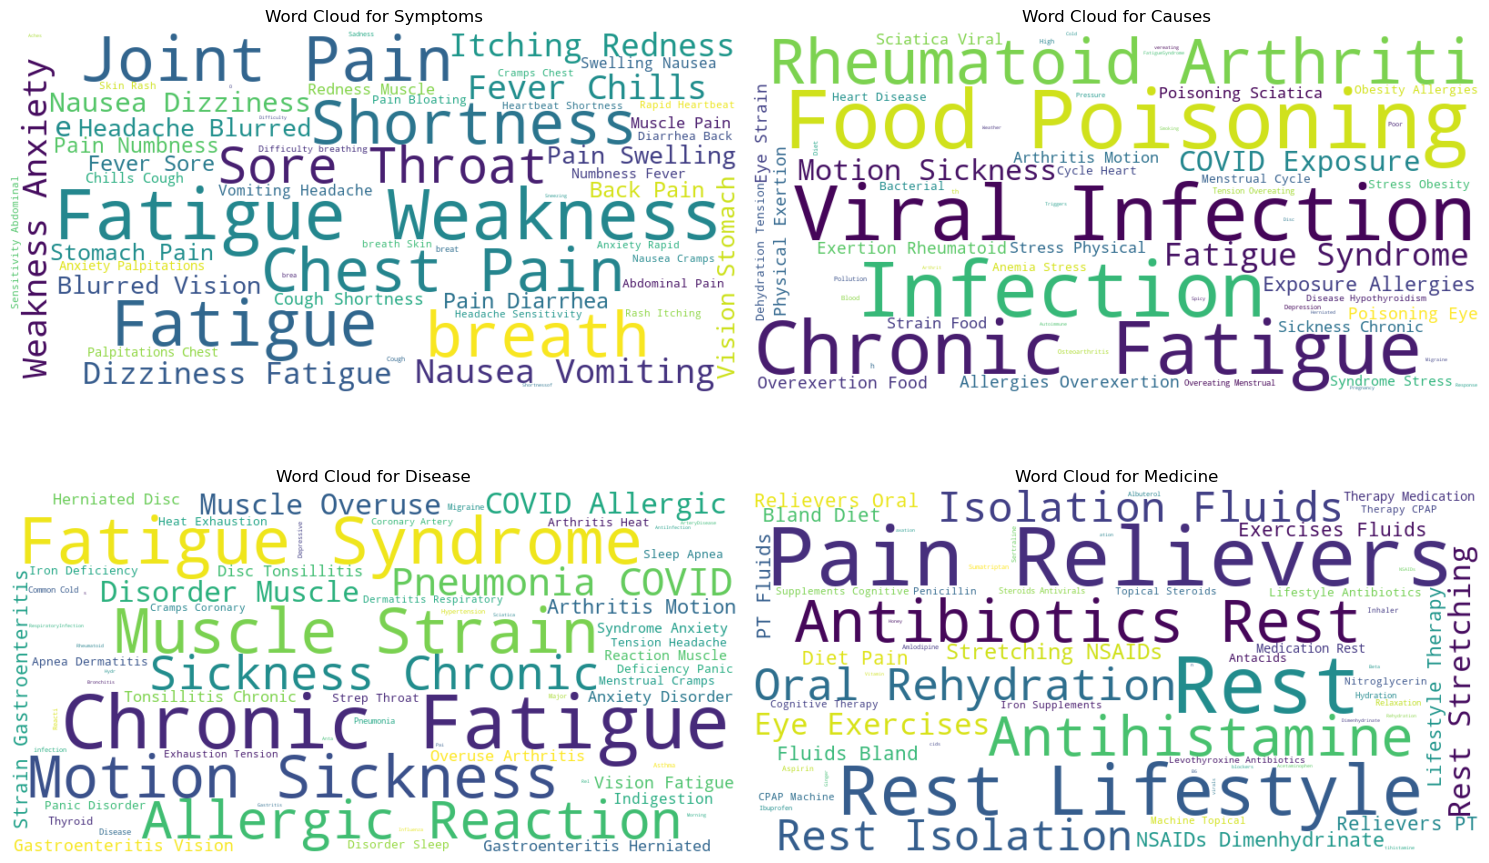

In [8]:
text_columns = ['Symptoms', 'Causes', 'Disease', 'Medicine']
plt.figure(figsize=(15, 10))
for i, column in enumerate(text_columns, 1):
    plt.subplot(2, 2, i)
    text_data = " ".join(m_data[column].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {column.capitalize()}')
plt.tight_layout()
plt.show()

Dataset has 51 unique groups
********************
And the top 10 counts are :
Reason
Supplement      3913
Pain            2852
Infection       2629
Hypertension    2505
Diabetes        2013
Fungal           878
Allergies        851
Depression       628
Anxiety          502
Anaemia          490
Name: count, dtype: int64
********************


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Supplement'),
  Text(1, 0, 'Pain'),
  Text(2, 0, 'Infection'),
  Text(3, 0, 'Hypertension'),
  Text(4, 0, 'Diabetes'),
  Text(5, 0, 'Fungal'),
  Text(6, 0, 'Allergies'),
  Text(7, 0, 'Depression'),
  Text(8, 0, 'Anxiety'),
  Text(9, 0, 'Anaemia')])

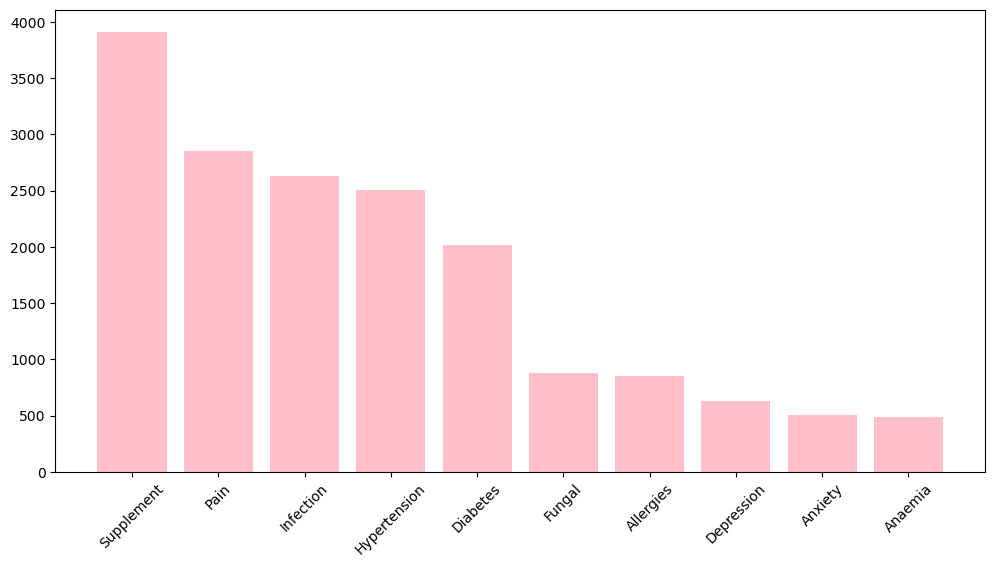

In [9]:
print(f'Dataset has {len(medicine.Reason.unique())} unique groups')
print('*'*20)
print(f'And the top 10 counts are :')
print(medicine.Reason.value_counts().head(10))
print('*'*20)
c = medicine.Reason.value_counts().head(10)
fig, ax = plt.subplots(1,1,figsize=(12,6))
ax.bar(c.index, c.values, width=0.8, color='pink')
plt.xticks(rotation=45)

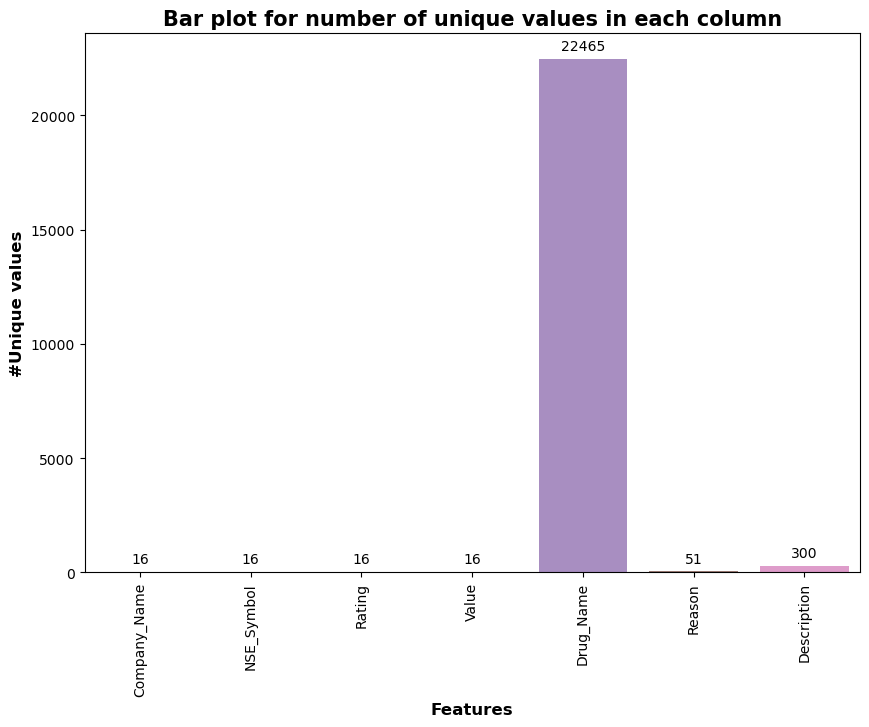

In [10]:
unique_df = pd.DataFrame()
unique_df['Features'] = medicine.columns
unique=[]
for i in medicine.columns:
    unique.append(medicine[i].nunique())
unique_df['Uniques'] = unique
f, ax = plt.subplots(1,1, figsize=(10,7))
splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

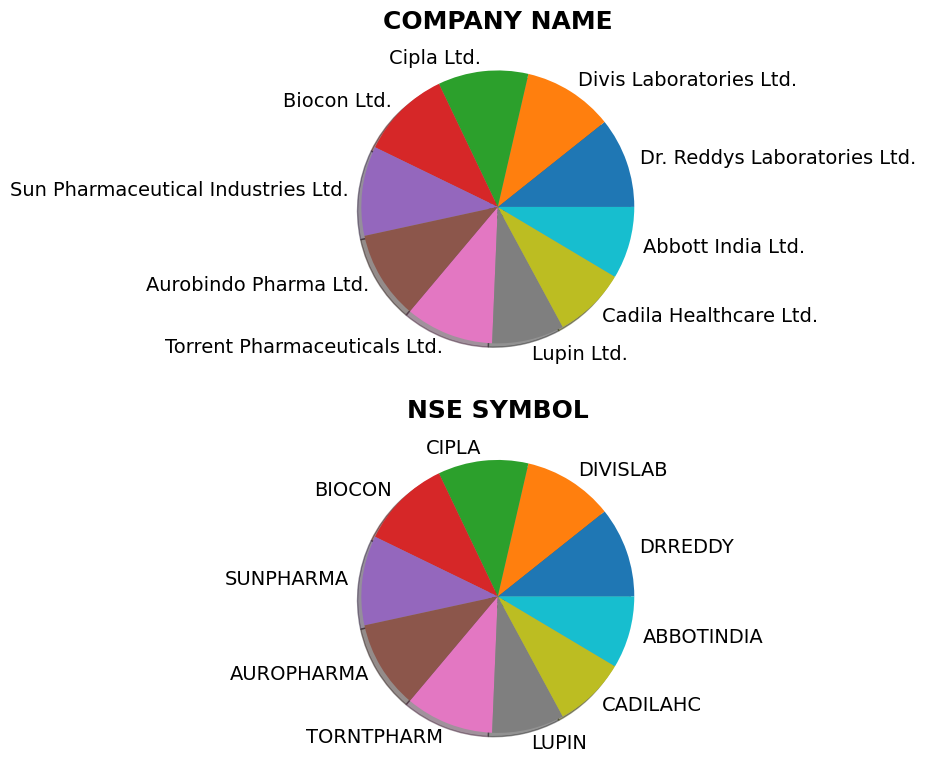

In [11]:
plt.rcParams['font.size'] = 14
fig, axarr = plt.subplots(2, figsize=(8, 8))
for col, ax in zip(['Company_Name', 'NSE_Symbol'], axarr.flat):
    dict_ = medicine[col].value_counts().head(10).to_dict()
    if 'Not Available' in dict_.keys():
        dict_.pop('Not Available')
    labels = []
    for i in dict_.keys():
        if isinstance(i, str):
            i = i.split(' ')
            if len(i) > 6:
                i[math.ceil(len(i)/2)-1] += '\n'
                labels.append(' '.join(i))
            else:
                labels.append(' '.join(i))
        else:
            labels.append(str(i))
    ax.pie(x=list(dict_.values()), labels=labels, shadow=True, startangle=0)
    col = (' '.join(col.split('_'))).upper()
    ax.set_title(col, weight='bold', fontsize=18)
plt.tight_layout()
plt.show()

In [12]:
# tfidf vectorization with cosine similarity
df = medicine[['Drug_Name', 'Description', 'Reason']].copy()
df['Reason'] = df['Reason'].astype(str)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Reason'])
user_condition = input("Enter your health condition: ")
user_condition_tfidf = tfidf_vectorizer.transform([user_condition])
similarity_scores = cosine_similarity(user_condition_tfidf, tfidf_matrix)
top_indices = similarity_scores.argsort()[0][::-1][:10]
top_medicines1 = df[['Drug_Name', 'Description']].iloc[top_indices].values.tolist()
table = PrettyTable(['Drug Name', 'Description'])
for med in top_medicines1:
    table.add_row([med[0], med[1]])
print(f"\nTop 10 recommended medicines for {user_condition}:\n")
print(table)


Top 10 recommended medicines for Allergies:

+---------------------------------------------------------+-----------------------------------------------------+
|                        Drug Name                        |                     Description                     |
+---------------------------------------------------------+-----------------------------------------------------+
|                Novahist 10mg Tablet 10'S                | treat Acne which often refer to as pimples or spots |
|                 Lcet M 10/5mg Syrup 60ml                |                Itching can be soothen               |
|                  LE ZENRID Tablet 10's                  |                 relief from allergy                 |
| Ldio 1 M 4/2.5mg Tablet 10'SLdio 1 M 10/5mg Tablet 10'S |          releief from all type of allergies         |
|               LCZ MONT 10/5MG TABLET 10'S               |                 relief from allergy                 |
|  LCZ 10MG TABLET 10'SLCZ 5MG TABLET 10'S

In [13]:
#tfidf vectorization using nearest neighbors
from sklearn.neighbors import NearestNeighbors
df = medicine[['Drug_Name', 'Description', 'Reason']].copy()
df['Reason'] = df['Reason'].astype(str)
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Reason'])
user_condition = input("Enter your health condition: ")
user_condition_tfidf = tfidf_vectorizer.transform([user_condition])
nn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
nn_model.fit(tfidf_matrix)
_, top_indices = nn_model.kneighbors(user_condition_tfidf)
top_medicines = df[['Drug_Name', 'Description']].iloc[top_indices[0]].values.tolist()
table = PrettyTable(['Drug Name', 'Description'])
for med in top_medicines:
    table.add_row([med[0], med[1]])
print(f"\nTop 10 recommended medicines for {user_condition} using Nearest Neighbors:\n")
print(table)


Top 10 recommended medicines for Allergies using Nearest Neighbors:

+------------------------------------------------+---------------------------------------------------+
|                   Drug Name                    |                    Description                    |
+------------------------------------------------+---------------------------------------------------+
|              Foristal Tablet 10'S              |               skin care for allergy               |
|         Flutispray Nasal Spray 120Mdi          |                relief from allergy                |
| Fullcover Tablet 10'SFullcover Suspension 60ml |               skin care for allergy               |
|            FULCORT 6mg Tablet 10's             | soothens allergies and good for all types of skin |
|            Formicet LM Tablet 10'S             |                relief from itching                |
|              Formicet Tablet 10'S              |               Itching can be soothen              |
|  

In [16]:
#using cosine similarity
df = m_data[['Causes', 'Symptoms', 'Disease', 'Medicine']].copy()
df = df.drop_duplicates()
tfidf_vectorizer = TfidfVectorizer()
print('Enter Your Choice: \n1. Medicine\n2. Symptoms\n3. Disease\n')
n = input()
if n == '1':
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Medicine'])
    user_condition = input("Enter your health condition: ")
elif n == '2':
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Symptoms'])
    user_condition = input("Enter your health condition: ")
else:
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Disease'])
    user_condition = input("Enter your health condition: ")
user_condition_tfidf = tfidf_vectorizer.transform([user_condition])
similarity_scores = cosine_similarity(user_condition_tfidf, tfidf_matrix)
threshold = 0.2  
top_indices = [i for i, score in enumerate(similarity_scores[0]) if score > threshold]
if top_indices:
    top_medicines = df[['Causes', 'Symptoms', 'Disease', 'Medicine']].iloc[top_indices].values.tolist()
    table = PrettyTable(['Causes', 'Symptoms', 'Disease', 'Medicine'])
    for med in top_medicines:
        table.add_row([med[0], med[1], med[2], med[3]])
    print(f"\nTop medicines matching {user_condition}:\n")
    print(table)
else:
    print(f"No matching medicines found for {user_condition}")

Enter Your Choice: 
1. Medicine
2. Symptoms
3. Disease


Top medicines matching Penicillin:

+----------------------+--------------------+-------------------+------------+
|        Causes        |      Symptoms      |      Disease      |  Medicine  |
+----------------------+--------------------+-------------------+------------+
| Bacterial Infection  |    Sore Throat     |    Strep Throat   | Penicillin |
| Bacterial Infection  | Sore Throat, Cough |    Strep Throat   | Penicillin |
| Bacterial Infection  | Sore Throat, Cough | Strep Throat      | Penicillin |
+----------------------+--------------------+-------------------+------------+


In [17]:
#using k-neighbors
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from prettytable import PrettyTable
df = m_data[['Causes', 'Symptoms', 'Disease', 'Medicine']].copy()
df = df.drop_duplicates()
tfidf_vectorizer = TfidfVectorizer()
print('Enter Your Choice: \n1. Medicine\n2. Symptoms\n3. Disease\n')
n = input()
if n == '1':
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Medicine'])
    user_condition = input("Enter your health condition: ")
elif n == '2':
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Symptoms'])
    user_condition = input("Enter your health condition: ")
else:
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['Disease'])
    user_condition = input("Enter your health condition: ")
nn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
nn_model.fit(tfidf_matrix)
user_condition_tfidf = tfidf_vectorizer.transform([user_condition])
_, top_indices = nn_model.kneighbors(user_condition_tfidf)
if any(top_indices[0]):
    top_medicines = df[['Causes', 'Symptoms', 'Disease', 'Medicine']].iloc[top_indices[0]].values.tolist()
    table = PrettyTable(['Causes', 'Symptoms', 'Disease', 'Medicine'])
    for med in top_medicines:
        table.add_row([med[0], med[1], med[2], med[3]])
    print(f"\nTop medicines matching {user_condition} using Nearest Neighbors:\n")
    print(table)
else:
    print(f"No matching medicines found for {user_condition}")

Enter Your Choice: 
1. Medicine
2. Symptoms
3. Disease


Top medicines matching Penicillin using Nearest Neighbors:

+--------------------------+----------------------------+--------------------------+---------------------+
|          Causes          |          Symptoms          |         Disease          |       Medicine      |
+--------------------------+----------------------------+--------------------------+---------------------+
|   Bacterial Infection    |     Sore Throat, Cough     |    Strep Throat          |      Penicillin     |
|   Bacterial Infection    |     Sore Throat, Cough     |       Strep Throat       |      Penicillin     |
|   Bacterial Infection    |        Sore Throat         |       Strep Throat       |      Penicillin     |
|   Rheumatoid Arthritis   |   e Joint Pain, Swelling   |         Arthritis        |        NSAIDs       |
|  th  COVID-19 Exposure   | e Cough, Shortness of brea |         COVID-19         |  Isolation, Fluids  |
|      Food Poisoning      